In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_csv('./sample_data/ETH-USD.csv')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df


,Date,Open,High,Low,Close,Adj Close,Volume
0,11/1/2018,197.537003,203.753998,197.328003,198.871994,198.871994,1336700000
1,11/2/2018,198.981995,201.268997,198.755005,200.634995,200.634995,1451870000
2,11/3/2018,200.740005,200.740005,199.524994,200.186005,200.186005,1307150000
3,11/4/2018,200.158005,211.272003,198.985992,207.485992,207.485992,1749300000
4,11/5/2018,207.100006,210.819000,206.572998,209.091003,209.091003,1613510000
...,...,...,...,...,...,...,...
1822,10/28/2023,1780.084229,1800.605347,1773.436646,1776.618164,1776.618164,4226112731
1823,10/29/2023,1776.563965,1810.488647,1766.052979,1795.546021,1795.546021,4358528382
1824,10/30/2023,1795.589111,1829.249512,1779.364502,1810.088623,1810.088623,7534051038
1825,10/31/2023,1810.131592,1819.972656,1784.567627,1816.458984,1816.458984,6477922747


In [3]:
# Hàm chuyển giá trị từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

In [4]:
# Áp dụng hàm chuyển đổi cho Date
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-01,197.537003,203.753998,197.328003,198.871994,198.871994,1336700000
1,2018-11-02,198.981995,201.268997,198.755005,200.634995,200.634995,1451870000
2,2018-11-03,200.740005,200.740005,199.524994,200.186005,200.186005,1307150000
3,2018-11-04,200.158005,211.272003,198.985992,207.485992,207.485992,1749300000
4,2018-11-05,207.100006,210.819000,206.572998,209.091003,209.091003,1613510000
...,...,...,...,...,...,...,...
1822,2023-10-28,1780.084229,1800.605347,1773.436646,1776.618164,1776.618164,4226112731
1823,2023-10-29,1776.563965,1810.488647,1766.052979,1795.546021,1795.546021,4358528382
1824,2023-10-30,1795.589111,1829.249512,1779.364502,1810.088623,1810.088623,7534051038
1825,2023-10-31,1810.131592,1819.972656,1784.567627,1816.458984,1816.458984,6477922747


In [5]:
# Chia train test validate theo tỉ lệ 7:1:2
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1) #x_train chứa các chỉ số, là biến độc lập
#reshape(-1,1) đảm bảo rằng x_train là một mảng 2D
#np.array(...) chuyển đổi...sang mảng numpy
y_train = np.array(train_data['Close']) #y_train chứa gtr Close, là biến phụ thuộc

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(x_val)

In [8]:
# 6. Quá trình tạo index predict 100 ngày tiếp theo
last_index =  df.index[-1] #lấy chỉ số dòng cuối cùng trong dataframe
last_data = pd.RangeIndex(start=last_index, stop=last_index+100, step=1)

# Tạo một mảng numpy chứa 100 số nguyên liên tiếp bắt đầu từ last_index + 1
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Dự đoán giá đóng cửa cho next 100 days
y_next_100_days = model.predict(x_next_100_days)

# In ra giá đóng cửa dự đoán cho 30 ngày tiếp theo
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 100 days:
[5003.94021659 5007.12256059 5010.30490459 5013.48724859 5016.6695926
 5019.8519366  5023.0342806  5026.2166246  5029.39896861 5032.58131261
 5035.76365661 5038.94600061 5042.12834462 5045.31068862 5048.49303262
 5051.67537662 5054.85772062 5058.04006463 5061.22240863 5064.40475263
 5067.58709663 5070.76944064 5073.95178464 5077.13412864 5080.31647264
 5083.49881665 5086.68116065 5089.86350465 5093.04584865 5096.22819266
 5099.41053666 5102.59288066 5105.77522466 5108.95756867 5112.13991267
 5115.32225667 5118.50460067 5121.68694468 5124.86928868 5128.05163268
 5131.23397668 5134.41632068 5137.59866469 5140.78100869 5143.96335269
 5147.14569669 5150.3280407  5153.5103847  5156.6927287  5159.8750727
 5163.05741671 5166.23976071 5169.42210471 5172.60444871 5175.78679272
 5178.96913672 5182.15148072 5185.33382472 5188.51616873 5191.69851273
 5194.88085673 5198.06320073 5201.24554474 5204.42788874 5207.61023274
 5210.79257674 5213.97492075 52

In [9]:
# 7. Tính RMSE: Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2)) #mean: tính giá trị trung bình
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE cho validate và test
valid_mae = np.mean(np.abs(y_pred_val - y_val)) #abs: giá trị tuyệt đối
test_mae = np.mean(np.abs(y_pred - y_test))

# Tính MAPE cho validate và test
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 2954.7639916657554
Testing RMSE: 2327.7791184537214
Validation MAE: 2942.994855351998
Testing MAE: 2280.5905612786037
Validation MAPE: 168.26717095289877
Testing MAPE: 156.0424576008435


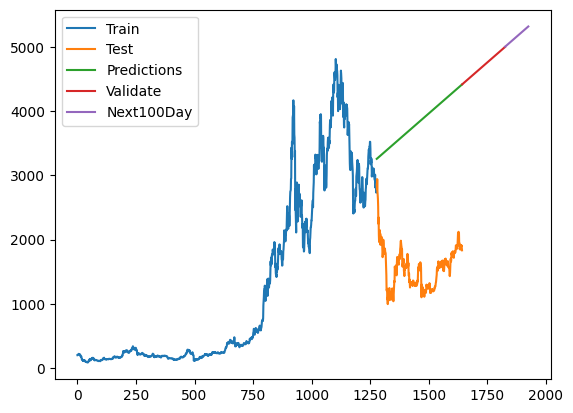

In [10]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_100_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next100Day'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=1278, stop=1643, step=1)